In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df1 = pd.read_excel("data/Consumption/Aggregated_Community-Scale_Utility_Energy_Data_07.25.24.xlsx")
#df2 = pd.read_excel("data/Consumption/Energy Consumption.xls")
#df3 = pd.read_excel("data/Consumption/Solar_Installation_Data_090822.xlsx")

df1 = pd.read_csv("data/Consumption/Aggregated_Community-Scale_Utility_Energy_Data_07.25.24.csv")
df2 = pd.read_csv("data/Consumption/NJ_Energy_Consumption.csv")
df3 = pd.read_csv("data/Consumption/Solar_Installation_Data_090822.csv")

/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_8199/241582748.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("data/Consumption/Solar_Installation_Data_090822.csv")


In [3]:
df2.head()

,Unnamed: 0,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,826,1990,NJ,Total Electric Power Industry,Total,39968834.0
1,827,1990,NJ,Total Electric Power Industry,Coal,7057820.0
2,828,1990,NJ,Total Electric Power Industry,Hydroelectric Conventional,31351.0
3,829,1990,NJ,Total Electric Power Industry,Natural Gas,6914325.0
4,830,1990,NJ,Total Electric Power Industry,Nuclear,23770387.0


In [12]:
by_source = df2[df2["TYPE OF PRODUCER"] == "Total Electric Power Industry"]
print(by_source["ENERGY SOURCE"].unique())
by_source["CLEAN"] = 0
by_source["CLEAN"] = by_source["ENERGY SOURCE"].map({
    "Total": 0,
    "Coal": 0,
    "Hydroelectric Conventional": 1,
    "Natural Gas": 0,
    "Nuclear": 0,
    "Other Biomass": 1,
    "Petroleum": 0,
    "Pumped Storage": 0,
    "Wood and Wood Derived Fuels": 1,
    "Other Gases": 0,
    "Other": 0,
    "Wind": 1,
    "Solar Thermal and Photovoltaic": 1
})

result = by_source.groupby(["YEAR", "CLEAN"])["GENERATION (Megawatthours)"].sum().reset_index()
result

['Total' 'Coal' 'Hydroelectric Conventional' 'Natural Gas' 'Nuclear'
 'Other Biomass' 'Petroleum' 'Pumped Storage'
 'Wood and Wood Derived Fuels' 'Other Gases' 'Other' 'Wind'
 'Solar Thermal and Photovoltaic']


/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_8199/3724732056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_source["CLEAN"] = 0
/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_8199/3724732056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_source["CLEAN"] = by_source["ENERGY SOURCE"].map({


,YEAR,CLEAN,GENERATION (Megawatthours)
0,1990,0,79656788.0
1,1990,1,280880.0
2,1991,0,86226569.0
3,1991,1,826363.0
4,1992,0,86401459.0
...,...,...,...
63,2021,1,2123567.0
64,2022,0,127912457.0
65,2022,1,2208816.0
66,2023,0,126212853.0


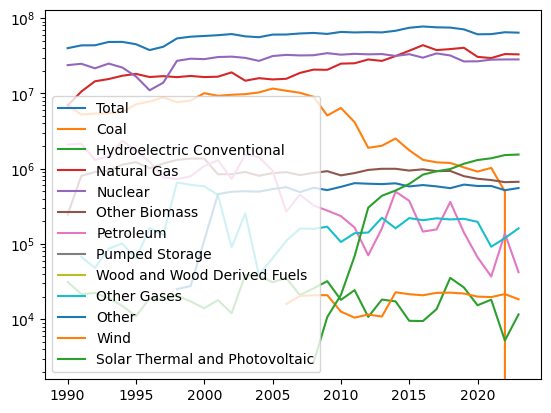

In [5]:
for source in by_source["ENERGY SOURCE"].unique():
    plt.plot(by_source[by_source["ENERGY SOURCE"] == source]["YEAR"], by_source[by_source["ENERGY SOURCE"] == source]["GENERATION (Megawatthours)"], label = source)

plt.yscale("log")
plt.legend()
plt.show()

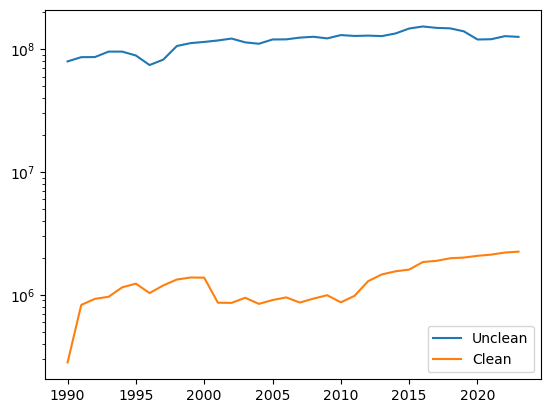

In [16]:
plt.plot(result["YEAR"].unique(), result[result["CLEAN"] == 0]["GENERATION (Megawatthours)"], label = "Unclean")
plt.plot(result["YEAR"].unique(), result[result["CLEAN"] == 1]["GENERATION (Megawatthours)"], label = "Clean")
plt.legend()
plt.yscale("log")

plt.show()

In [1]:
import pandas as pd
df = pd.read_excel("data/new/ZIP/NJ ZIP Data- To Share.xlsx", "Data")

In [82]:
df.drop(columns = "Vehicle Model Year", inplace = True)
result = df.groupby(["Product ID"])["Total Cost of Vehicles"].sum().reset_index()["Total Cost of Vehicles"]
df.dropna(axis = 0, inplace = True)
#df["Total Cost of Vehicles"] = result

In [85]:
df["Total Cost of Vehicles"] = result.values

In [3]:
df.to_csv("data/new/ZIP/NJ ZIP Data-To Share.csv")